**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

**Loading Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url='https://drive.google.com/file/d/1SbPRgXbKhSN9QL7Jyltj77VcDq1YeJFq/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

**Exploratory Data Analysis** 

In [ ]:
df.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,...,time_register,order_items_id,status,created_at,sale_price,product_id,num_of_item,total_spend,product_name,product_category
0,29694,Scott,Anderson,scottanderson@example.org,60,M,Acre,8979 Stephens Oval Apt. 816,69917-400,Rio Branco,...,2019-08-16 17:06:00,53179,Complete,2020-03-29 14:25:04,21.00,26025,1,21.000000,Fruit of the Loom Men's Boxer Briefs 2 Pack,Underwear
1,29967,Mike,Beck,mikebeck@example.org,12,M,Acre,76404 Michael Way Apt. 377,69917-400,Rio Branco,...,2019-05-09 12:08:00,53663,Complete,2019-08-17 08:58:55,135.00,18777,1,135.000000,Ibex Men's Shak Lite 1/2 Zip Jacket,Active
2,86352,Jacob,Bryant,jacobbryant@example.com,45,M,Acre,43554 Kimberly Tunnel,69917-400,Rio Branco,...,2019-04-14 04:18:00,155658,Complete,2022-04-07 00:40:09,69.50,21445,3,208.500000,ROCAWEAR BED-STUDY MEDIUM INDIGO JEAN MENS R07...,Jeans
3,86352,Jacob,Bryant,jacobbryant@example.com,45,M,Acre,43554 Kimberly Tunnel,69917-400,Rio Branco,...,2019-04-14 04:18:00,155659,Complete,2022-04-08 03:56:38,179.00,20814,3,537.000000,True Religion Men's Billy Boot Cut Jean,Jeans
4,86352,Jacob,Bryant,jacobbryant@example.com,45,M,Acre,43554 Kimberly Tunnel,69917-400,Rio Branco,...,2019-04-14 04:18:00,155660,Complete,2022-04-08 01:07:22,15.27,25204,3,45.810001,Timberland Men's Crew Socks,Socks


In [ ]:
# Statistik Deskriptif
df[['age','sale_price','num_of_item']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,45283.0,40.926021,16.950039,12.00,26.0,41.00,56.00,70.0
sale_price,45283.0,59.637594,64.916110,0.02,24.5,39.99,69.95,999.0
num_of_item,45283.0,1.893360,1.059512,1.00,1.0,2.00,2.00,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45283 entries, 0 to 45282
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                45283 non-null  int64  
 1   first_name        45283 non-null  object 
 2   last_name         45283 non-null  object 
 3   email             45283 non-null  object 
 4   age               45283 non-null  int64  
 5   gender            45283 non-null  object 
 6   state             45283 non-null  object 
 7   street_address    45283 non-null  object 
 8   postal_code       45283 non-null  object 
 9   city              44814 non-null  object 
 10  country           45283 non-null  object 
 11  latitude          45283 non-null  float64
 12  longitude         45283 non-null  float64
 13  traffic_source    45283 non-null  object 
 14  time_register     45283 non-null  object 
 15  order_items_id    45283 non-null  int64  
 16  status            45283 non-null  object

**Preprocessing Data**

In [ ]:
#Mengisi Missing Value pada City
print(df["city"].value_counts().head())
df["city"] = df["city"].fillna(df["city"].value_counts().index.tolist()[0])

Shanghai    1073
Beijing      960
Seoul        676
Shenzhen     564
Dongguan     425
Name: city, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45283 entries, 0 to 45282
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                45283 non-null  int64  
 1   first_name        45283 non-null  object 
 2   last_name         45283 non-null  object 
 3   email             45283 non-null  object 
 4   age               45283 non-null  int64  
 5   gender            45283 non-null  object 
 6   state             45283 non-null  object 
 7   street_address    45283 non-null  object 
 8   postal_code       45283 non-null  object 
 9   city              45283 non-null  object 
 10  country           45283 non-null  object 
 11  latitude          45283 non-null  float64
 12  longitude         45283 non-null  float64
 13  traffic_source    45283 non-null  object 
 14  time_register     45283 non-null  object 
 15  order_items_id    45283 non-null  int64  
 16  status            45283 non-null  object

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45281 entries, 0 to 45282
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                45281 non-null  int64  
 1   first_name        45281 non-null  object 
 2   last_name         45281 non-null  object 
 3   email             45281 non-null  object 
 4   age               45281 non-null  int64  
 5   gender            45281 non-null  object 
 6   state             45281 non-null  object 
 7   street_address    45281 non-null  object 
 8   postal_code       45281 non-null  object 
 9   city              45281 non-null  object 
 10  country           45281 non-null  object 
 11  latitude          45281 non-null  float64
 12  longitude         45281 non-null  float64
 13  traffic_source    45281 non-null  object 
 14  time_register     45281 non-null  object 
 15  order_items_id    45281 non-null  int64  
 16  status            45281 non-null  object

In [ ]:
# Mencari data  last_purchase terakhir pada order_items
df['created_at'].max()

'2022-06-06 17:17:33.00518'

In [ ]:
#Memasukkan current date
import datetime as dt
currentDateTime = dt.datetime.now()
now = currentDateTime.date()

In [ ]:
df['date'] = pd.DatetimeIndex(df.created_at).date

In [ ]:
df.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,...,order_items_id,status,created_at,sale_price,product_id,num_of_item,total_spend,product_name,product_category,date
0,29694,Scott,Anderson,scottanderson@example.org,60,M,Acre,8979 Stephens Oval Apt. 816,69917-400,Rio Branco,...,53179,Complete,2020-03-29 14:25:04,21.00,26025,1,21.000000,Fruit of the Loom Men's Boxer Briefs 2 Pack,Underwear,2020-03-29
1,29967,Mike,Beck,mikebeck@example.org,12,M,Acre,76404 Michael Way Apt. 377,69917-400,Rio Branco,...,53663,Complete,2019-08-17 08:58:55,135.00,18777,1,135.000000,Ibex Men's Shak Lite 1/2 Zip Jacket,Active,2019-08-17
2,86352,Jacob,Bryant,jacobbryant@example.com,45,M,Acre,43554 Kimberly Tunnel,69917-400,Rio Branco,...,155658,Complete,2022-04-07 00:40:09,69.50,21445,3,208.500000,ROCAWEAR BED-STUDY MEDIUM INDIGO JEAN MENS R07...,Jeans,2022-04-07
3,86352,Jacob,Bryant,jacobbryant@example.com,45,M,Acre,43554 Kimberly Tunnel,69917-400,Rio Branco,...,155659,Complete,2022-04-08 03:56:38,179.00,20814,3,537.000000,True Religion Men's Billy Boot Cut Jean,Jeans,2022-04-08
4,86352,Jacob,Bryant,jacobbryant@example.com,45,M,Acre,43554 Kimberly Tunnel,69917-400,Rio Branco,...,155660,Complete,2022-04-08 01:07:22,15.27,25204,3,45.810001,Timberland Men's Crew Socks,Socks,2022-04-08


**Mencari Recency**

In [ ]:
# Mengelompokkan customer berdasarkan tanggal terakhir mereka berbelanja
recency_df = df.groupby(['id'],as_index=False)['date'].max()
recency_df.columns = ['id','LastPurchaseDate']
recency_df.head()

,id,LastPurchaseDate
0,1,2019-07-21
1,5,2022-05-19
2,7,2022-02-13
3,10,2021-10-31
4,14,2021-01-16


In [ ]:
#Menghitung seberapa sering pelanggan 
recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (now - x).days)

In [ ]:
recency_df.head()

,id,LastPurchaseDate,Recency
0,1,2019-07-21,1075
1,5,2022-05-19,42
2,7,2022-02-13,137
3,10,2021-10-31,242
4,14,2021-01-16,530


In [ ]:
recency_df.drop(columns=['LastPurchaseDate'],inplace=True)

**Frekuensi Pembelian**

In [ ]:
#Menghitung seberapa sering Customer membeli baraang
frequency_df = df.copy()
frequency_df.drop_duplicates(subset=['id','order_items_id'], keep="first", inplace=True) 
frequency_df = frequency_df.groupby('id',as_index=False)['order_items_id'].count()
frequency_df.columns = ['id','Frequency']
frequency_df.head()

,id,Frequency
0,1,4
1,5,4
2,7,1
3,10,1
4,14,1


In [ ]:
frequency_df.describe()

,id,Frequency
count,27624.000000,27624.000000
mean,50180.572871,1.639191
std,28822.481680,1.018754
min,1.000000,1.000000
25%,25470.750000,1.000000
50%,50250.500000,1.000000
75%,75111.250000,2.000000
max,99996.000000,10.000000


In [ ]:
#Mendeteksi Outliers
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(frequency_df['Frequency'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

In [ ]:
median = np.median(frequency_df['Frequency'])# Replace with median
for i in sample_outliers:
    frequency_df['Frequency'] = np.where(frequency_df['Frequency']==i, 1,frequency_df['Frequency'])
print("Sample: ", frequency_df['Frequency'])
print("New array: ",frequency_df['Frequency'])
# print(x.dtype)

Sample:  0        1
1        1
2        1
3        1
4        1
        ..
27619    1
27620    2
27621    1
27622    1
27623    2
Name: Frequency, Length: 27624, dtype: int64
New array:  0        1
1        1
2        1
3        1
4        1
        ..
27619    1
27620    2
27621    1
27622    1
27623    2
Name: Frequency, Length: 27624, dtype: int64


**Monetary Value**

In [ ]:
#Menghitung total biaya berapa banyak customers membeli pada setiap transaksi
df['Total_cost'] = df['sale_price'] * df['num_of_item']

In [ ]:
#Menghitung seberapa banyak costumer spends pada setiap transaksi
monetary_df=df.groupby('id',as_index=False)['Total_cost'].sum()
monetary_df.columns = ['id','Monetary']

In [ ]:
monetary_df.head()

,id,Monetary
0,1,743.72
1,5,849.76
2,7,73.71
3,10,55.00
4,14,34.04


In [ ]:
#Mendeteksi Outliers
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(monetary_df['Monetary'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [439.32000000000005, 439.4, 439.47, 439.66999999999996, 439.75, 439.97, 439.98, 439.98, 440.0, 440.0, 440.0, 440.02, 440.24, 440.37, 440.8, 441.0, 441.27, 441.3, 441.36, 441.41999999999996, 441.52, 441.54, 441.84, 441.9, 441.98, 441.98, 442.0, 442.2, 442.26, 442.44000000000005, 443.0, 443.41999999999996, 443.61, 443.7, 443.85, 443.88, 443.9, 443.90999999999997, 443.93999999999994, 443.98, 443.98, 444.0, 444.15999999999997, 444.94, 444.98, 445.48, 445.5, 445.83, 445.98, 445.98, 445.98, 445.98, 446.0, 446.04, 446.76, 446.90999999999997, 446.94, 446.97, 447.0, 447.0, 447.47999999999996, 447.76, 447.86, 447.88, 447.9, 447.9, 447.94, 447.95, 447.96000000000004, 448.26, 448.35, 448.47, 448.79999999999995, 448.97, 448.98, 448.99, 448.99, 449.0, 449.0, 449.69999999999993, 449.88, 449.88, 449.9, 449.93999999999994, 449.97, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.58, 450.76, 450.94, 450.95, 451.27, 451.52, 451.53, 451.88, 451.94, 451.95000000000005, 451.96, 451.9

In [ ]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(monetary_df['Monetary'], 10)
ninetieth_percentile = np.percentile(monetary_df['Monetary'], 90)
# print(tenth_percentile, ninetieth_percentile)b = np.where(sample<tenth_percentile, tenth_percentile, sample)
monetary_df['Monetary'] = np.where(monetary_df['Monetary']>ninetieth_percentile, ninetieth_percentile, monetary_df['Monetary'])

In [ ]:
monetary_df.describe()

,id,Monetary
count,27624.000000,27624.000000
mean,50180.572871,184.852512
std,28822.481680,297.822847
min,1.000000,0.020000
25%,25470.750000,32.950000
50%,50250.500000,72.890000
75%,75111.250000,195.390000
max,99996.000000,4483.740000


In [ ]:
#Outlier di frequency
Q1 = np.quantile(monetary_df['Monetary'], .25)
Q3 = np.quantile(monetary_df['Monetary'], .75)
IQR = Q3 - Q1

In [ ]:
min_IQR = Q1 - 1.5 *IQR
max_IQR = Q3 + 1.5 * IQR

print('IQR minimum = ', min_IQR)
print('IQR maksimum = ', max_IQR)

IQR minimum =  -210.70999999999998
IQR maksimum =  439.04999999999995


In [ ]:
#Mengimputasi data outlier dengan median
monetary_df['Monetary'] = np.where(monetary_df['Monetary'] >439.04999999999995, median,monetary_df['Monetary'])

In [ ]:
monetary_df.head()

,id,Monetary
0,1,1.00
1,5,1.00
2,7,73.71
3,10,55.00
4,14,34.04


**Menggabungkan Receny, Frekuensi, dan Monetary value menjadi satu tabel RFM**

In [ ]:
#Mengkombinasikan tabel Recency dengan Frekuensi menjadi tabel RF
rf = recency_df.merge(frequency_df,left_on='id',right_on='id')

In [ ]:
#Mengkombinasikan  tabel RF dengan monetary value menjadi tabel RFM
rfm = rf.merge(monetary_df,left_on='id', right_on='id')

rfm.set_index('id',inplace=True) 

In [ ]:
rfm.head()

,Recency,Frequency,Monetary
id,,,
1,1075,1,1.00
5,42,1,1.00
7,137,1,73.71
10,242,1,55.00
14,530,1,34.04


In [ ]:
rfm_segmentation = rfm.copy()

In [ ]:
rfm_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27624 entries, 0 to 27623
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   level_0          27624 non-null  int64   
 1   index            27624 non-null  int64   
 2   id               27624 non-null  int64   
 3   Recency          27624 non-null  int64   
 4   Frequency        27624 non-null  int64   
 5   Monetary         27624 non-null  float64 
 6   cluster          27624 non-null  int32   
 7   Recency_Score    27624 non-null  category
 8   Frequency_Score  27624 non-null  category
 9   Monetary_Score   27624 non-null  category
 10  RFM_SCORE        27624 non-null  object  
 11  Segment          27624 non-null  object  
dtypes: category(3), float64(1), int32(1), int64(5), object(2)
memory usage: 1.9+ MB


**Modelling**

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


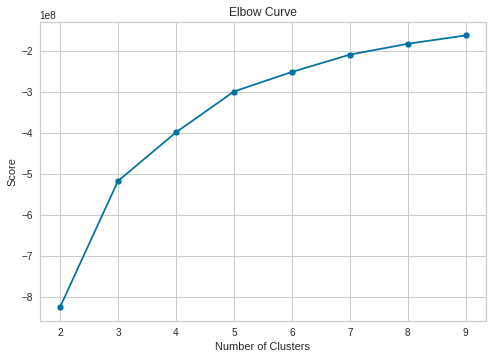

In [ ]:
from sklearn.cluster import KMeans
Nc = range(2, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(rfm_segmentation).score(rfm_segmentation) for i in range(len(kmeans))]

sns.lineplot(Nc,score)
sns.scatterplot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
#Fitting data pada Kmeans Theorm
kmeans = KMeans(n_clusters=5, random_state=0).fit(rfm_segmentation)

In [ ]:
#Membuat kolom cluster dengan pelabelan dari hasil K_means
rfm_segmentation['cluster'] = kmeans.labels_

In [ ]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,cluster
id,,,,
1,1075,1,1.00,1
5,42,1,1.00,0
7,137,1,73.71,0
10,242,1,55.00,4
14,530,1,34.04,2


In [ ]:
#Melihat tabel segmentasi
rfm_segmentation[cluster == 2].head(10)

,Recency,Frequency,Monetary,cluster
id,,,,
14,530,1,34.04,2
58,541,1,69.00,2
100,677,1,46.99,2
131,551,1,8.45,2
162,605,1,14.00,2
164,741,1,34.99,2
166,564,1,145.00,2
178,638,1,229.99,2
182,557,2,353.86,2


**Evaluasi Model**

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(rfm_segmentation,kmeans.labels_ )



0.45065952985375796

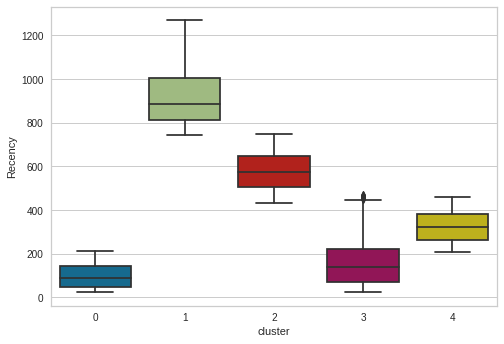

In [ ]:
#Mencari tingkat recency setiap klusternya (semakin tinggi maka semakin buruk)
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Recency)

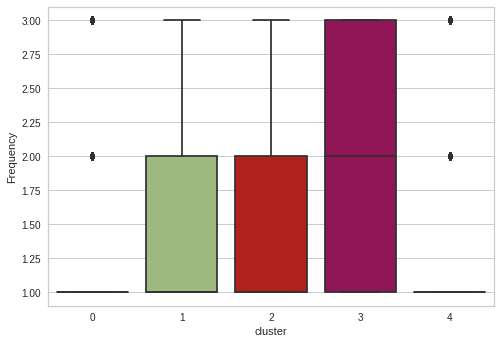

In [ ]:
#Mencari tingkat Frekuensi (Semakin tinggi maka semakin baik)
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Frequency)

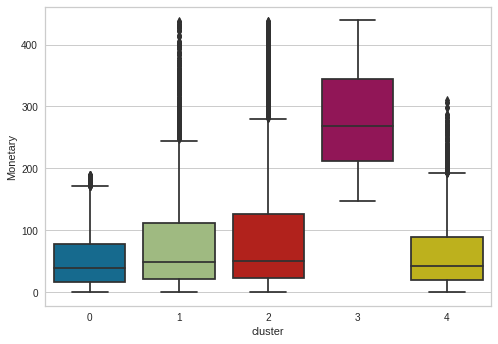

In [ ]:
#Mencari tingkat monetary rate setiap cluster (Semakin tinggi maka semakin baik)
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Monetary)

**Memberikan pelabelan cluster berdasarkan RFM Score**

In [ ]:
rfm_segmentation["Recency_Score"]  = pd.qcut(rfm_segmentation['Recency'], 5, [5, 4, 3, 2, 1])
rfm_segmentation["Frequency_Score"]  = pd.qcut(rfm_segmentation['Frequency'].rank(method="first"), 5, [1, 2, 3, 4, 5])
rfm_segmentation["Monetary_Score"]  = pd.qcut(rfm_segmentation['Monetary'], 5, [1, 2, 3, 4, 5])

In [ ]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
id,,,,,,
1,1075,1,1.00,1,1,1
5,42,1,1.00,5,1,1
7,137,1,73.71,4,1,4
10,242,1,55.00,3,1,3
14,530,1,34.04,2,1,2


In [ ]:
rfm_segmentation["RFM_SCORE"] = (rfm_segmentation['Recency_Score'].astype(str) +
                    rfm_segmentation['Frequency_Score'].astype(str))

rfm_segmentation.head() 

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE
id,,,,,,,
1,1075,1,1.00,1,1,1,11
5,42,1,1.00,5,1,1,51
7,137,1,73.71,4,1,4,41
10,242,1,55.00,3,1,3,31
14,530,1,34.04,2,1,2,21


In [ ]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE
id,,,,,,,
1,1075,1,1.00,1,1,1,11
5,42,1,1.00,5,1,1,51
7,137,1,73.71,4,1,4,41
10,242,1,55.00,3,1,3,31
14,530,1,34.04,2,1,2,21


In [ ]:
rfm_segmentation['Segment'] = rfm_segmentation['RFM_SCORE']
rfm_segmentation.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE,Segment
id,,,,,,,,
1,1075,1,1.00,1,1,1,11,11
5,42,1,1.00,5,1,1,51,51
7,137,1,73.71,4,1,4,41,41
10,242,1,55.00,3,1,3,31,31
14,530,1,34.04,2,1,2,21,21


In [ ]:
seg_map = {
    r'[1-2][1-2]': 'At Risk Customer',
    r'[1-2][3-4]': 'At Risk Customer',
    r'[1-2]5': 'Can’t Lose Customer',
    r'3[1-2]': 'Can’t Lose Customer',
    r'33': 'Potential Loyalists',
    r'[3-4][4-5]': 'Champions Customer',
    r'41': 'New Customers ',
    r'51': 'New Customers ',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions Customer'
}

rfm_segmentation['Segment'] = rfm_segmentation['RFM_SCORE'].replace(seg_map, regex=True)
rfm_segmentation.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE,Segment
id,,,,,,,,
1,1075,1,1.00,1,1,1,11,At Risk Customer
5,42,1,1.00,5,1,1,51,New Customers
7,137,1,73.71,4,1,4,41,New Customers
10,242,1,55.00,3,1,3,31,Can’t Lose Customer
14,530,1,34.04,2,1,2,21,At Risk Customer


In [ ]:
rfm_segmentation['Segment'] = rfm_segmentation['Segment'].replace(seg_map, regex=True)
rfm_segmentation.reset_index(inplace=True)
rfm_segmentation.head()

,id,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE,Segment
0,1,1075,1,1.00,1,1,1,11,At Risk Customer
1,5,42,1,1.00,5,1,1,51,New Customers
2,7,137,1,73.71,4,1,4,41,New Customers
3,10,242,1,55.00,3,1,3,31,Can’t Lose Customer
4,14,530,1,34.04,2,1,2,21,At Risk Customer


In [ ]:
rfm_segmentation.groupby('Segment').agg({"id":"count"}).sort_values("id",ascending=False)

,id
Segment,
At Risk Customer,9023
Champions Customer,6825
Potential Loyalists,5425
Can’t Lose Customer,4196
New Customers,2155


In [ ]:
Customer_Segmentation = pd.merge(df, rfm_segmentation, on='id', how='inner')
Customer_Segmentation

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,...,date,Total_cost,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE,Segment
0,29694,Scott,Anderson,scottanderson@example.org,60,M,Acre,8979 Stephens Oval Apt. 816,69917-400,Rio Branco,...,2020-03-29,21.00,823,1,21.00,1,2,2,12,At Risk Customer
1,29967,Mike,Beck,mikebeck@example.org,12,M,Acre,76404 Michael Way Apt. 377,69917-400,Rio Branco,...,2019-08-17,135.00,1048,1,135.00,1,2,4,12,At Risk Customer
2,86352,Jacob,Bryant,jacobbryant@example.com,45,M,Acre,43554 Kimberly Tunnel,69917-400,Rio Branco,...,2022-04-07,208.50,83,3,1.00,4,5,1,45,Champions Customer
3,86352,Jacob,Bryant,jacobbryant@example.com,45,M,Acre,43554 Kimberly Tunnel,69917-400,Rio Branco,...,2022-04-08,537.00,83,3,1.00,4,5,1,45,Champions Customer
4,86352,Jacob,Bryant,jacobbryant@example.com,45,M,Acre,43554 Kimberly Tunnel,69917-400,Rio Branco,...,2022-04-08,45.81,83,3,1.00,4,5,1,45,Champions Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45276,33926,Matthew,Smith,matthewsmith@example.org,56,M,Jeju Special Self-Governing Province,9082 Brown Curve Suite 957,695-970,Jeju City,...,2021-06-14,100.00,380,2,127.58,2,4,4,24,At Risk Customer
45277,33926,Matthew,Smith,matthewsmith@example.org,56,M,Jeju Special Self-Governing Province,9082 Brown Curve Suite 957,695-970,Jeju City,...,2021-06-15,27.58,380,2,127.58,2,4,4,24,At Risk Customer
45278,97594,Jonathan,Salazar,jonathansalazar@example.org,50,M,Jeju Special Self-Governing Province,150 Zavala Vista,699-920,Seogwipo City,...,2021-09-01,54.97,302,1,54.97,3,4,3,34,Champions Customer
45279,91847,Megan,Carter,megancarter@example.com,67,F,Jeju Special Self-Governing Province,39055 Mark Meadow Apt. 438,699-930,Seogwipo City,...,2021-11-09,25.00,233,1,25.00,3,4,2,34,Champions Customer


In [ ]:
print("Export to excel..")
Customer_Segmentation.to_excel("Customer_Segmentation.xlsx", index=False)

print("Done!")

Export to excel..
Done!


In [ ]:
rfm_segmentation[rfm_segmentation.Segment == "champions"].head(10)

,id,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE,Segment


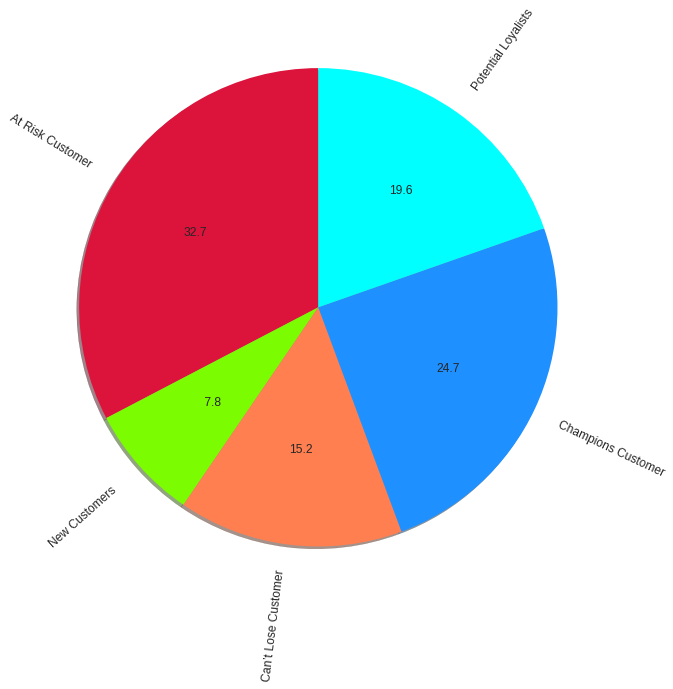

In [ ]:
colors  = ("crimson", "lawngreen", "coral" , "dodgerblue" , "aqua")
explodes = [0.25, 0.25, 0.25]

rfm_segmentation["Segment"].value_counts(sort=False).plot.pie(colors=colors,
                                                 textprops={'fontsize': 12}, 
                                                 autopct = '%4.1f',
                                                 startangle= 90, 
                                                 radius =2, 
                                                 rotatelabels=True,
                                                 shadow = True, 
                                                 explode = None)
plt.ylabel("");